In [1]:
import gymnasium as gym
import numpy as np
import sys
sys.path.append("../src")
from solver import Solver
from math import inf

In [2]:
env = gym.make('Taxi-v3').env
solver = Solver(alpha=0.1, gamma=0.6, epsilon=0.1)
solver.load_env(env)
solver.solve(use_qtable=False)

c:\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(-595, 148, 52)

In [13]:
# np.set_printoptions(threshold=sys.maxsize)
# print(solver.q_table)

In [7]:
from matplotlib import pyplot as plt
ev_points, av_scores, av_steps, av_illegal_moves = solver.evaluate(5, 100000, 20)

Learning iterations per ev point: 20000
Stop points: [ 20000  40000  60000  80000 100000]
Episodes per evaluation point: 20

Training data (iters 0 - 19999)
-----------------
Calculating average at evaluation stop: 0
Episode 0: steps=14, score=7, ill_moves=0
Episode 1: steps=13, score=8, ill_moves=0
Episode 2: steps=14, score=7, ill_moves=0
Episode 3: steps=11, score=10, ill_moves=0
Episode 4: steps=11, score=10, ill_moves=0
Episode 5: steps=12, score=9, ill_moves=0
Episode 6: steps=17, score=4, ill_moves=0
Episode 7: steps=14, score=7, ill_moves=0
Episode 8: steps=11, score=10, ill_moves=0
Episode 9: steps=13, score=8, ill_moves=0
Episode 10: steps=18, score=3, ill_moves=0
Episode 11: steps=17, score=4, ill_moves=0
Episode 12: steps=17, score=4, ill_moves=0
Episode 13: steps=12, score=9, ill_moves=0
Episode 14: steps=13, score=8, ill_moves=0
Episode 15: steps=15, score=6, ill_moves=0
Episode 16: steps=15, score=6, ill_moves=0
Episode 17: steps=13, score=8, ill_moves=0
Episode 18: step

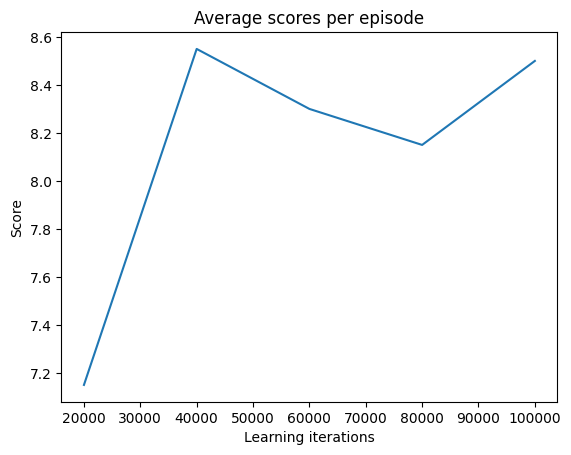

In [8]:
plt.plot(ev_points, av_scores)
plt.title('Average scores per episode')
plt.ylabel('Score')
plt.xlabel('Learning iterations')
plt.show()

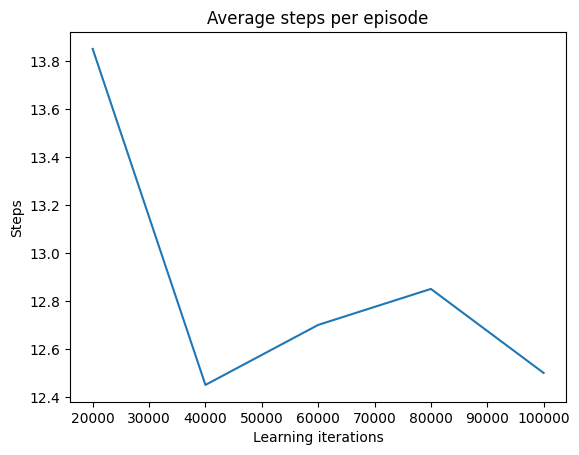

In [9]:
plt.plot(ev_points, av_steps)
plt.title('Average steps per episode')
plt.ylabel('Steps')
plt.xlabel('Learning iterations')
plt.show()